In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from google.colab import files
uploaded= files.upload()
df=pd.read_csv('Liverdd.csv')
df.head(10)

Saving Liverdd.csv to Liverdd.csv


,age,gender,total Bilirubin,direct Bilirubin,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selectorfield
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   total Bilirubin   583 non-null    float64
 3   direct Bilirubin  583 non-null    float64
 4   Alkphos           583 non-null    int64  
 5   Sgpt              583 non-null    int64  
 6   Sgot              583 non-null    int64  
 7   TP                583 non-null    float64
 8   ALB               583 non-null    float64
 9   A/G Ratio         583 non-null    float64
 10  Selectorfield     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
df.shape

(583, 11)

In [ ]:
df.isna().values.any()

False

In [ ]:
df['Selectorfield'].value_counts()

1    407
2    176
Name: Selectorfield, dtype: int64

In [ ]:
df.loc[df["Selectorfield"]==2,"Selectorfield"]=0
df['Selectorfield'].value_counts()

1    407
0    176
Name: Selectorfield, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Predicted_attriute')

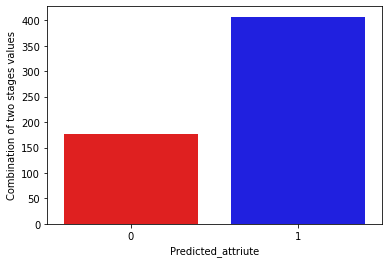

In [ ]:
#sns.countplot(df['Selectorfield'],label='value')
sns.countplot(df.Selectorfield,palette=["#FF0000","#0000FF"])
#plt.title("[1]----> Secondery Stage  [0]----> Primary Stage"):
plt.ylabel('Combination of two stages values')
plt.xlabel('Predicted_attriute')


In [ ]:
df.dtypes

age                   int64
gender               object
total Bilirubin     float64
direct Bilirubin    float64
Alkphos               int64
Sgpt                  int64
Sgot                  int64
TP                  float64
ALB                 float64
A/G Ratio           float64
Selectorfield         int64
dtype: object

In [ ]:
df = df.replace({'Female':1,'Male':0})

In [ ]:
df

,age,gender,total Bilirubin,direct Bilirubin,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selectorfield
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,46,1,14.2,7.8,374,38,77,4.3,2.0,0.80,1
579,48,0,1.4,0.6,263,38,66,5.8,2.2,0.61,1
580,47,0,2.7,1.3,275,123,73,6.2,3.3,1.10,1
581,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0


In [ ]:
df.dtypes

age                   int64
gender                int64
total Bilirubin     float64
direct Bilirubin    float64
Alkphos               int64
Sgpt                  int64
Sgot                  int64
TP                  float64
ALB                 float64
A/G Ratio           float64
Selectorfield         int64
dtype: object

# Univariate Selection


In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
#apply SelectionKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2,k=10)
fit = bestfeatures.fit(x,y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [ ]:
#concat two dataframes for better visualization
featurescore = pd.concat([dfcolumns,dfscores],axis=1)
featurescore.columns = ['Specs','Score']   #mapping the dataframe columns

In [ ]:
featurescore

,Specs,Score
0,age,84.683499
1,gender,11.720925
2,total Bilirubin,149.095902
3,direct Bilirubin,96.703355
4,Alkphos,919.904718
5,Sgpt,18734.833592
6,Sgot,12878.766525
7,TP,1.839820
8,ALB,1.058344
9,A/G Ratio,2.190236


In [ ]:
print(featurescore.nlargest(10,'Score'))    #print 10 best feature

              Specs         Score
5              Sgpt  18734.833592
6              Sgot  12878.766525
4           Alkphos    919.904718
2   total Bilirubin    149.095902
3  direct Bilirubin     96.703355
0               age     84.683499
1            gender     11.720925
9         A/G Ratio      2.190236
7                TP      1.839820
8               ALB      1.058344


**Feature Importance**


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [ ]:
#use inbuilt class feature_importance of tree based classifiers
print(model.feature_importances_)

[0.18610065 0.04596009 0.09275634 0.09787088 0.09059482 0.08886873
 0.09488685 0.12081453 0.0690286  0.11311851]


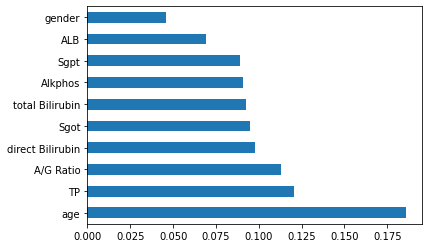

In [ ]:
#plot graph of feature importances for better visualization
feat_importance = pd.Series(model.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

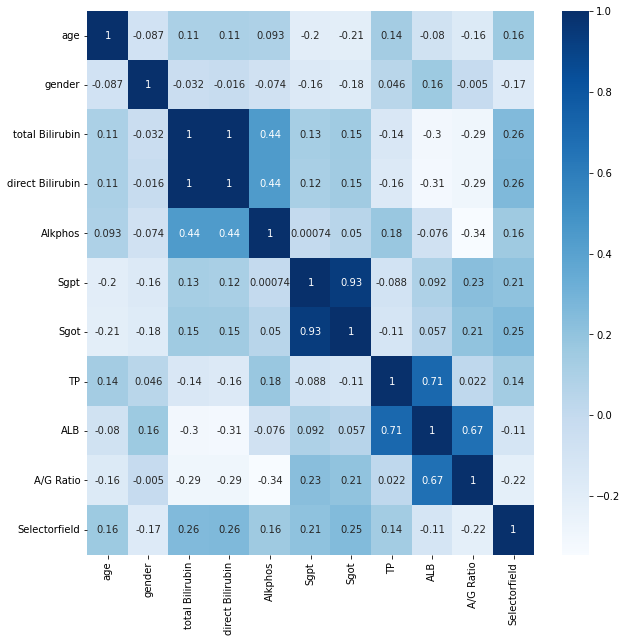

In [ ]:
#using Pearson Correlation
plt.figure(figsize=(10,10))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Blues)
plt.show()

**Train Test Split**

In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

**FILE IMPORT**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
digits= load_digits()

**MODELS**

In [ ]:
def models(x_train,y_train):
 #Logistic Regression    0
  log = LogisticRegression(random_state=42 ) 
  log.fit(x_train,y_train)

  #Random Forest         1
  forest=RandomForestClassifier(n_estimators=2,criterion='entropy',random_state=30)
  forest.fit(x_train,y_train)

                         
  # Decision tree        2
  tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=1, random_state=42)
  tree.fit(x_train,y_train)

                       
                        
  #Gradient Boosting     3   
  gb_clf=GradientBoostingClassifier ( n_estimators=30,max_features=1,random_state=42)
  gb_clf.fit(x_train,y_train)

                        
  #Support Vector Machines  4
  svm = SVC(kernel= 'sigmoid',C=30, gamma=100)
  svm.fit(x_train,y_train)

                       
  #k-Nearest Neighbors  5
  classifier = KNeighborsClassifier(n_neighbors=8)
  classifier.fit(x_train,y_train)

                      
  #Adaboost Classifier   6
  clf = AdaBoostClassifier(n_estimators=100, random_state=30)
  clf.fit(x_train,y_train)

                     
  #Gaussian            7
  gause_clf = GaussianNB()
  gause_clf.fit(x_train,y_train)

                     
  #Gradient Bosting    8
  gb_clf = GradientBoostingClassifier(max_features=2, max_depth=2, random_state=0)
  gb_clf.fit(x_train,y_train)

                    
  #GridSearch CV       9
  #cv=GridSearchCV(log,param,cv=5,n_jobs=-1)
  #cv.fit(x_train,y_train)

                   
  #XGBclassifier      10
  xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                     max_depth = 5, alpha = 10, n_estimators = 10)
  xgb.fit(x_train, y_train)


  print('[0]Logistic Regression Training Accuracy:',log.score(x_train,y_train))
  print('[1]Random Forest Training Accuracy:',forest.score(x_train,y_train))
  print('[2]Decision tree Training Accuracy:',tree.score(x_train,y_train))
  print('[3]Gradient Boosting Training Accuracy:',gb_clf.score(x_train,y_train))
  print('[4]Support Vector Machines Training Accuracy:',svm.score(x_train,y_train))
  print('[5]k-Nearest Neighbors Training Accuracy:',classifier.score(x_train,y_train))
  print('[6]Adaboost Classifier Training Accuracy:',clf.score(x_train,y_train))
  print('[7]Gaussian Training Accuracy:',gause_clf.score(x_train,y_train))
  print('[8]Gradient Bosting Training Accuracy:',gb_clf.score(x_train,y_train))
  #print('[9]GridSearch CV Training Accuracy:',cv.score(x_train,y_train))
  print('[9]XGBclassifier Training Accuracy:',xgb.score(x_train,y_train))

  return log,forest,tree,gb_clf,svm,classifier,clf,gause_clf,gb_clf,xgb

**Confusion Matrix**

In [ ]:
model = models(x_train, y_train)                       #model fitting

[11:05:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]Logistic Regression Training Accuracy: 0.8133047210300429
[1]Random Forest Training Accuracy: 1.0
[2]Decision tree Training Accuracy: 0.6909871244635193
[3]Gradient Boosting Training Accuracy: 0.9849785407725322
[4]Support Vector Machines Training Accuracy: 0.4978540772532189
[5]k-Nearest Neighbors Training Accuracy: 0.9935622317596566
[6]Adaboost Classifier Training Accuracy: 1.0
[7]Gaussian Training Accuracy: 0.592274678111588
[8]Gradient Bosting Training Accuracy: 0.9849785407725322
[9]XGBclassifier Training Accuracy: 1.0


confusion matrix of model 0 is:
[[17 12]
 [12 76]]

Classification report:
              precision    recall  f1-score   support

           0       0.59      0.59      0.59        29
           1       0.86      0.86      0.86        88

    accuracy                           0.79       117
   macro avg       0.72      0.72      0.72       117
weighted avg       0.79      0.79      0.79       117


testing accuracy: 79.48717948717949
Sensitivity: 0.5862068965517241
Specificity: 0.8636363636363636
false positive rate: 0.13636363636363635
False negative: 0.41379310344827586
Negative Peridictive Value: 0.8636363636363636
False Discovery rate: 0.41379310344827586
Mean Absolute Eror: 0.20512820512820512
Mean Squared Error: 0.20512820512820512
Root Mean Squared Error: 0.4529108136578383
log_loss: 7.084959219205289
Çohen_Kappa_Scorer: 0.44984326018808785




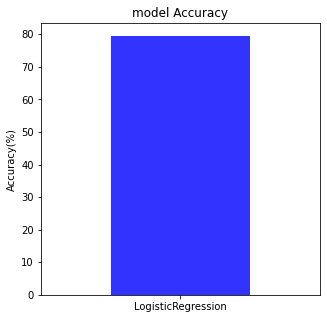



confusion matrix of model 1 is:
[[26  3]
 [ 6 82]]

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.96      0.93      0.95        88

    accuracy                           0.92       117
   macro avg       0.89      0.91      0.90       117
weighted avg       0.93      0.92      0.92       117


testing accuracy: 92.3076923076923
Sensitivity: 0.8125
Specificity: 0.9647058823529412
false positive rate: 0.03529411764705882
False negative: 0.1875
Negative Peridictive Value: 0.9318181818181818
False Discovery rate: 0.10344827586206896
Mean Absolute Eror: 0.07692307692307693
Mean Squared Error: 0.07692307692307693
Root Mean Squared Error: 0.2773500981126146
log_loss: 2.6568494559528784
Çohen_Kappa_Scorer: 0.8006059458435902




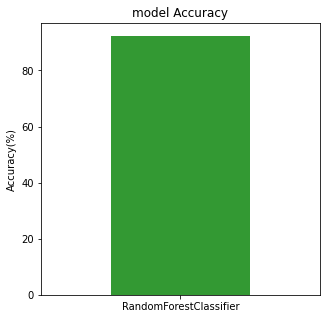



confusion matrix of model 2 is:
[[15 14]
 [30 58]]

Classification report:
              precision    recall  f1-score   support

           0       0.33      0.52      0.41        29
           1       0.81      0.66      0.73        88

    accuracy                           0.62       117
   macro avg       0.57      0.59      0.57       117
weighted avg       0.69      0.62      0.65       117


testing accuracy: 62.39316239316239
Sensitivity: 0.3333333333333333
Specificity: 0.8055555555555556
false positive rate: 0.19444444444444445
False negative: 0.6666666666666666
Negative Peridictive Value: 0.6590909090909091
False Discovery rate: 0.4827586206896552
Mean Absolute Eror: 0.37606837606837606
Mean Squared Error: 0.37606837606837606
Root Mean Squared Error: 0.6132441406718666
log_loss: 12.9890372285478
Çohen_Kappa_Scorer: 0.14880952380952384




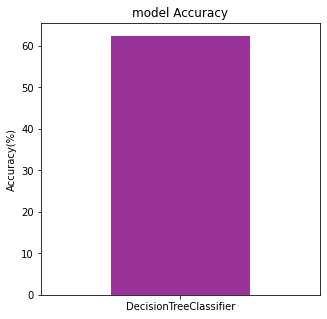



confusion matrix of model 3 is:
[[18 11]
 [ 8 80]]

Classification report:
              precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.88      0.91      0.89        88

    accuracy                           0.84       117
   macro avg       0.79      0.76      0.77       117
weighted avg       0.83      0.84      0.83       117


testing accuracy: 83.76068376068376
Sensitivity: 0.6923076923076923
Specificity: 0.8791208791208791
false positive rate: 0.12087912087912088
False negative: 0.3076923076923077
Negative Peridictive Value: 0.9090909090909091
False Discovery rate: 0.3793103448275862
Mean Absolute Eror: 0.1623931623931624
Mean Squared Error: 0.1623931623931624
Root Mean Squared Error: 0.40298034988465925
log_loss: 5.608936299786626
Çohen_Kappa_Scorer: 0.5488126649076517




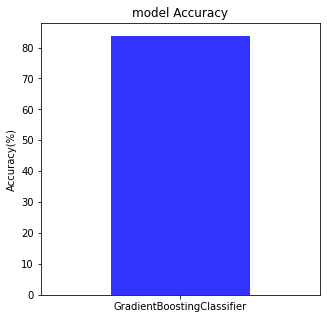



confusion matrix of model 4 is:
[[ 7 22]
 [34 54]]

Classification report:
              precision    recall  f1-score   support

           0       0.17      0.24      0.20        29
           1       0.71      0.61      0.66        88

    accuracy                           0.52       117
   macro avg       0.44      0.43      0.43       117
weighted avg       0.58      0.52      0.54       117


testing accuracy: 52.13675213675214
Sensitivity: 0.17073170731707318
Specificity: 0.7105263157894737
false positive rate: 0.2894736842105263
False negative: 0.8292682926829268
Negative Peridictive Value: 0.6136363636363636
False Discovery rate: 0.7586206896551724
Mean Absolute Eror: 0.47863247863247865
Mean Squared Error: 0.47863247863247865
Root Mean Squared Error: 0.6918326955503611
log_loss: 16.531530506482582
Çohen_Kappa_Scorer: -0.1273227804542325




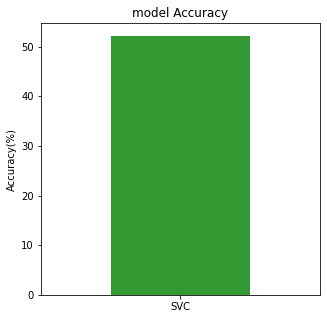



confusion matrix of model 5 is:
[[29  0]
 [ 3 85]]

Classification report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        29
           1       1.00      0.97      0.98        88

    accuracy                           0.97       117
   macro avg       0.95      0.98      0.97       117
weighted avg       0.98      0.97      0.97       117


testing accuracy: 97.43589743589743
Sensitivity: 0.90625
Specificity: 1.0
false positive rate: 0.0
False negative: 0.09375
Negative Peridictive Value: 0.9659090909090909
False Discovery rate: 0.0
Mean Absolute Eror: 0.02564102564102564
Mean Squared Error: 0.02564102564102564
Root Mean Squared Error: 0.16012815380508713
log_loss: 0.8856096511515568
Çohen_Kappa_Scorer: 0.9335353152811967




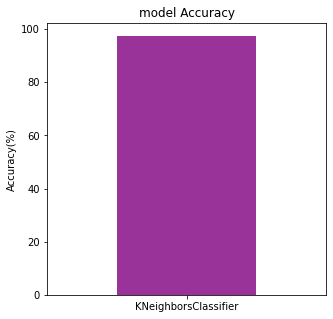



confusion matrix of model 6 is:
[[21  8]
 [11 77]]

Classification report:
              precision    recall  f1-score   support

           0       0.66      0.72      0.69        29
           1       0.91      0.88      0.89        88

    accuracy                           0.84       117
   macro avg       0.78      0.80      0.79       117
weighted avg       0.84      0.84      0.84       117


testing accuracy: 83.76068376068376
Sensitivity: 0.65625
Specificity: 0.9058823529411765
false positive rate: 0.09411764705882353
False negative: 0.34375
Negative Peridictive Value: 0.875
False Discovery rate: 0.27586206896551724
Mean Absolute Eror: 0.1623931623931624
Mean Squared Error: 0.1623931623931624
Root Mean Squared Error: 0.40298034988465925
log_loss: 5.608915797288415
Çohen_Kappa_Scorer: 0.5790569967809127




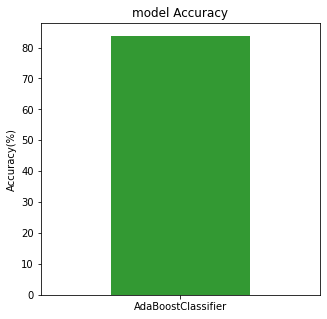



confusion matrix of model 7 is:
[[28  1]
 [56 32]]

Classification report:
              precision    recall  f1-score   support

           0       0.33      0.97      0.50        29
           1       0.97      0.36      0.53        88

    accuracy                           0.51       117
   macro avg       0.65      0.66      0.51       117
weighted avg       0.81      0.51      0.52       117


testing accuracy: 51.28205128205128
Sensitivity: 0.3333333333333333
Specificity: 0.9696969696969697
false positive rate: 0.030303030303030304
False negative: 0.6666666666666666
Negative Peridictive Value: 0.36363636363636365
False Discovery rate: 0.034482758620689655
Mean Absolute Eror: 0.48717948717948717
Mean Squared Error: 0.48717948717948717
Root Mean Squared Error: 0.6979824404521128
log_loss: 16.82659020604563
Çohen_Kappa_Scorer: 0.20122170319798782




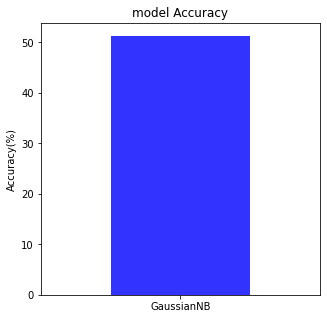



confusion matrix of model 8 is:
[[18 11]
 [ 8 80]]

Classification report:
              precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.88      0.91      0.89        88

    accuracy                           0.84       117
   macro avg       0.79      0.76      0.77       117
weighted avg       0.83      0.84      0.83       117


testing accuracy: 83.76068376068376
Sensitivity: 0.6923076923076923
Specificity: 0.8791208791208791
false positive rate: 0.12087912087912088
False negative: 0.3076923076923077
Negative Peridictive Value: 0.9090909090909091
False Discovery rate: 0.3793103448275862
Mean Absolute Eror: 0.1623931623931624
Mean Squared Error: 0.1623931623931624
Root Mean Squared Error: 0.40298034988465925
log_loss: 5.608936299786626
Çohen_Kappa_Scorer: 0.5488126649076517




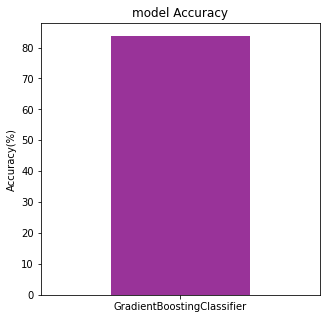



confusion matrix of model 9 is:
[[10 19]
 [ 5 83]]

Classification report:
              precision    recall  f1-score   support

           0       0.67      0.34      0.45        29
           1       0.81      0.94      0.87        88

    accuracy                           0.79       117
   macro avg       0.74      0.64      0.66       117
weighted avg       0.78      0.79      0.77       117


testing accuracy: 79.48717948717949
Sensitivity: 0.6666666666666666
Specificity: 0.8137254901960784
false positive rate: 0.18627450980392157
False negative: 0.3333333333333333
Negative Peridictive Value: 0.9431818181818182
False Discovery rate: 0.6551724137931034
Mean Absolute Eror: 0.20512820512820512
Mean Squared Error: 0.20512820512820512
Root Mean Squared Error: 0.4529108136578383
log_loss: 7.08500705836778
Çohen_Kappa_Scorer: 0.3436185133239832




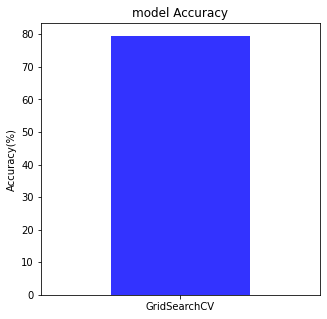

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,log_loss,cohen_kappa_score
from sklearn import metrics
for i in range (len(model)):
  print('confusion matrix of model',i,'is:')
  cm=confusion_matrix(y_test,model[i].predict(x_test))
  TP=cm[0][0]
  TN=cm[1][1]
  FP=cm[0][1]
  FN=cm[1][0]
  print(cm)
  print()
  result1=classification_report(y_test,model[i].predict(x_test))
  print("Classification report:",)
  print(result1)
  print()
  var=((TP+TN)/(TP+TN+FP+FN))*100
  print('testing accuracy:',var)
  print('Sensitivity:',TP/(TP+FN))
  print('Specificity:',TN/(TN+FP))
  print('false positive rate:',FP/(FP+TN))
  print('False negative:',FN/(FN+TP))
  print('Negative Peridictive Value:',TN/(TN+FN))
  print('False Discovery rate:',FP/(TP+FP))
  print('Mean Absolute Eror:',metrics.mean_absolute_error(y_test,model[i].predict(x_test)))
  print('Mean Squared Error:',metrics.mean_squared_error(y_test,model[i].predict(x_test)))
  print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,model[i].predict(x_test))))
  print('log_loss:',metrics.log_loss(y_test,model[i].predict(x_test)))
  print('Çohen_Kappa_Scorer:',cohen_kappa_score(y_test,model[i].predict(x_test)))
  
  print()
  print()
  name=['LogisticRegression','RandomForestClassifier','DecisionTreeClassifier','GradientBoostingClassifier','SVC','KNeighborsClassifier'
        ,'AdaBoostClassifier','GaussianNB','GradientBoostingClassifier','GridSearchCV','XGBClassifier']
  col_value=['blue','green','purple','blue','green','purple','green','blue','purple','blue','green','blue']
  model_accuracy=pd.Series(data=(var),index=[name[i]])
  fig=plt.figure(figsize=(5,5))
  width=0.75
  model_accuracy.sort_values().plot.bar(alpha=0.8,color=[col_value[i]])
  plt.xticks(rotation=0)
  plt.title('model Accuracy')
  plt.ylabel('Accuracy(%)')
  plt.show()
  print()
  print()

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
D = DecisionTreeClassifier(criterion='entropy', max_depth=1,random_state=42 ) 
R = RandomForestClassifier(n_estimators=2,criterion='entropy',random_state=30)
L = LogisticRegression(random_state=42 )
evc = VotingClassifier(estimators=[('D',D),('R',R),('L',L)],voting='soft' )
evc.fit(x_train,y_train)
evc.score(x_test,y_test)

0.8376068376068376

In [ ]:
D= DecisionTreeClassifier(criterion='entropy', max_depth=1,random_state=42 ) 
R= RandomForestClassifier(n_estimators=2,criterion='entropy',random_state=30)
G=GradientBoostingClassifier ( n_estimators=30,max_features=1,random_state=42)
evc = VotingClassifier(estimators=[('D',D),('R',R),('G',G)],voting='soft' )
evc.fit(x_train,y_train)
evc.score(x_test,y_test)


0.8803418803418803

In [ ]:
R= RandomForestClassifier(n_estimators=2,criterion='entropy',random_state=42)
G= GradientBoostingClassifier ( n_estimators=30,max_features=1,random_state=42)
K=KNeighborsClassifier(n_neighbors=8)
evc = VotingClassifier(estimators=[('R',R),('G',G),('K',K)],voting='soft' )
evc.fit(x_train,y_train)
evc.score(x_test,y_test)

0.9401709401709402

In [ ]:
R= RandomForestClassifier(n_estimators=2,criterion='entropy',random_state=42)
G= GradientBoostingClassifier ( n_estimators=30,max_features=1,random_state=42)
K=KNeighborsClassifier(n_neighbors=8)
evc = VotingClassifier(estimators=[('R',R),('G',G),('K',K)],voting='soft' )
evc.fit(x_train,y_train)
evc.score(x_test,y_test)

0.9401709401709402

In [ ]:
K=KNeighborsClassifier(n_neighbors=8)
R= RandomForestClassifier(n_estimators=2,criterion='entropy',random_state=42)
evc = VotingClassifier(estimators=[('K',K),('R',R)],voting='soft' )
evc.fit(x_train,y_train)
evc.score(x_test,y_test)



0.9487179487179487

In [ ]:
G=GradientBoostingClassifier( n_estimators=30,max_features=1,random_state=42)
A= AdaBoostClassifier(n_estimators=100, random_state=30)
evc = VotingClassifier(estimators=[('G',G),('A',A)],voting='soft' )
evc.fit(x_train,y_train)
evc.score(x_test,y_test)


0.8803418803418803

**SVM**

Score of Support Vector Machines:  0.978448275862069


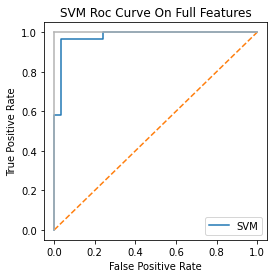

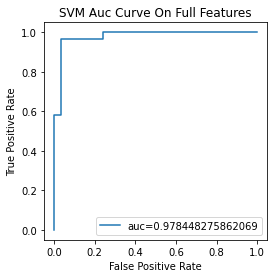

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn.metrics as metrics

#Support Vector Machines Roc Curve 
from sklearn.svm import SVC
svm = SVC(probability=True)
svm.fit(x_train,y_train)
y_score1 = svm.predict_proba(x_test)[:,1]
# Plot Receiving Operating Characteristic Curve
# Create true and false positive rates
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('Score of Support Vector Machines: ', roc_auc_score(y_test, y_score1))
# Plot ROC curves
plt.subplots(1, figsize=(4,4))
plt.title('SVM Roc Curve On Full Features')
plt.plot(false_positive_rate1, true_positive_rate1, label = "SVM")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()
print()
print()

#Support Vector Machines AUC Curve
svm = SVC(probability=True)
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
#AUC Curve
plt.subplots(1, figsize=(4,4))
y_pred_proba = svm.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.title('SVM Auc Curve On Full Features')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()
print()
print()


**KNeighborsClassifier**

Score of KNeighborsClassifier:  0.9994122257053292


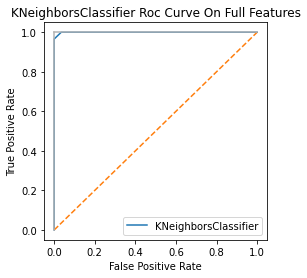

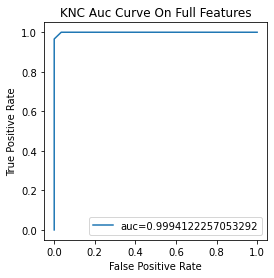

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn.metrics as metrics

#KNeighborsClassifier Roc Curve 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(x_train,y_train)
y_score1 = classifier.predict_proba(x_test)[:,1]
# Plot Receiving Operating Characteristic Curve
# Create true and false positive rates
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('Score of KNeighborsClassifier: ', roc_auc_score(y_test, y_score1))
# Plot ROC curves
plt.subplots(1, figsize=(4,4))
plt.title('KNeighborsClassifier Roc Curve On Full Features')
plt.plot(false_positive_rate1, true_positive_rate1, label = "KNeighborsClassifier")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()
print()
print()

#KNeighborsClassifier AUC Curve
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
#AUC Curve
plt.subplots(1, figsize=(4,4))
y_pred_proba = classifier.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.title('KNC Auc Curve On Full Features')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()
print()
print()

**RandomForestClassifier**

Score of RandomForestClassifier:  0.9259404388714733


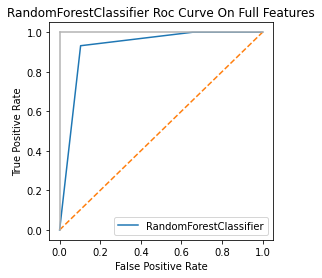

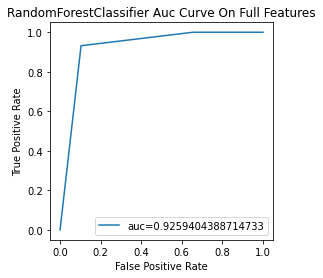

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn.metrics as metrics

#RandomForestClassifier Roc Curve 
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=2,criterion='entropy',random_state=30)
forest.fit(x_train,y_train)
y_score1 = forest.predict_proba(x_test)[:,1]
# Plot Receiving Operating Characteristic Curve
# Create true and false positive rates
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('Score of RandomForestClassifier: ', roc_auc_score(y_test, y_score1))
# Plot ROC curves
plt.subplots(1, figsize=(4,4))
plt.title('RandomForestClassifier Roc Curve On Full Features')
plt.plot(false_positive_rate1, true_positive_rate1, label = "RandomForestClassifier")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()
print()
print()

#RandomForestClassifier AUC Curve
forest = RandomForestClassifier(n_estimators=2,criterion='entropy',random_state=30)
forest.fit(x_train,y_train)
y_pred = forest.predict(x_test)
#AUC Curve
plt.subplots(1, figsize=(4,4))
y_pred_proba = forest.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.title('RandomForestClassifier Auc Curve On Full Features')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()
print()
print()